In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import operator
import math
from collections import Counter
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [33]:
def data_visualization(source_cl, target_cl, dataset):
    source_clusters=source_cl
    target_clusters=target_cl
    dataset=dataset
    folder="identity_clustering/"+str(source_clusters)+"-"+str(target_clusters)+"_filtering/"
    source_cluster_entropies=open(
        os.path.join(
            "../../data_dir/"+dataset+"/base_with_numbers/filtered_data/"+folder+"fullSource_cluster_entropies.txt"))
    target_cluster_entropies=open(
        os.path.join(
            "../../data_dir/"+dataset+"/base_with_numbers/filtered_data/"+folder+"fullTarget_cluster_entropies.txt"))

    def visualize(file, tag, plt_name1, plt_name2, plt_name3):
        sentences=[]
        entropies_long=[]
        entropies=[]
        sentence_lengths=[]
        cl_sizes=[]
        cl_sizes_long=[]
        sen_cl_size=[]
        for line in file:
            [sentence, entropy, cl_size]=line.split(";")
            entropy=float(entropy)
            cl_size=int(cl_size)
            #if entropy>0:
            #    entropy=entropy/math.log(int(cl_size), 2)
            #if cl_size>1:
            sentences.append([sentence, entropy])
            sen_cl_size.append([sentence, cl_size])
            sentence_lengths.append(len(sentence.split()))
            entropies_long.extend([entropy]*cl_size)
            cl_sizes_long.extend([cl_size]*cl_size)
            entropies.append(entropy)
            cl_sizes.append(cl_size)
        
        plt_name1.plot(sorted(entropies_long))
        #plt_name1.set_title(tag+" entropies")
        plt_name1.set_xlabel("Sentence no.")
        plt_name1.set_ylabel("Entropy")
        #plt_name3.plot(sorted(cl_sizes_long))
        #plt_name3.set_title(tag+" utterance frequencies")
        #plt_name3.axis([0,90000,-0.2,2])
        plt_name1.axis([78000, 90000, -0.2, 7.5])
        #plt_name3.axis([0, 90000, 0, 10])
        plt_name2.scatter(np.array(cl_sizes), np.array(entropies))
        #plt_name2.set_title(tag+" entropies with respect to frequency")
        plt_name2.set_xlabel("Utterance frequency")
        plt_name2.set_ylabel("Entropy")
        plt_name3.scatter(np.array(sentence_lengths), np.array(entropies))
        #plt_name3.set_title(tag+" entropies with respect to sentence length")
        plt_name3.set_xlabel("No. of words in utterance")
        plt_name3.set_ylabel("Entropy")
        plt_name3.axis([0, 20, 1.1,7])
        
        return sentences, sen_cl_size
        

    plt.close('all')
    fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6))=plt.subplots(nrows=3, ncols=2)
    fig.set_size_inches(13,15)
    source_sentences, source_cl_sizes=visualize(source_cluster_entropies, "Source", ax1, ax3, ax5)
    target_sentences, target_cl_sizes=visualize(target_cluster_entropies, "Target", ax2, ax4, ax6)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    
    source_cluster_entropies.close()
    target_cluster_entropies.close()
    
    # show the most common
    return source_sentences, target_sentences, source_cl_sizes, target_cl_sizes

In [182]:
# get all data
medoid_dict={}
cluster_elements=open("../../data_dir/"+dataset+"/base_with_numbers/filtered_data/hash_jaccard/"
                      +str(source_clusters)+"_clusters/fullSource_cluster_elements.txt")
for line in cluster_elements:
    line=line.split(";")[1]
    [medoid, pair, _]=line.split("<=====>")
    [source, target]=pair.split("=")
    if medoid in medoid_dict:
        medoid_dict[medoid].append(source)
    else:
        medoid_dict[medoid]=[source]

In [4]:
# identity: 72593, 71427
# 129763-133760
source_clusters=72593
target_clusters=71427
dataset="DailyDialog"

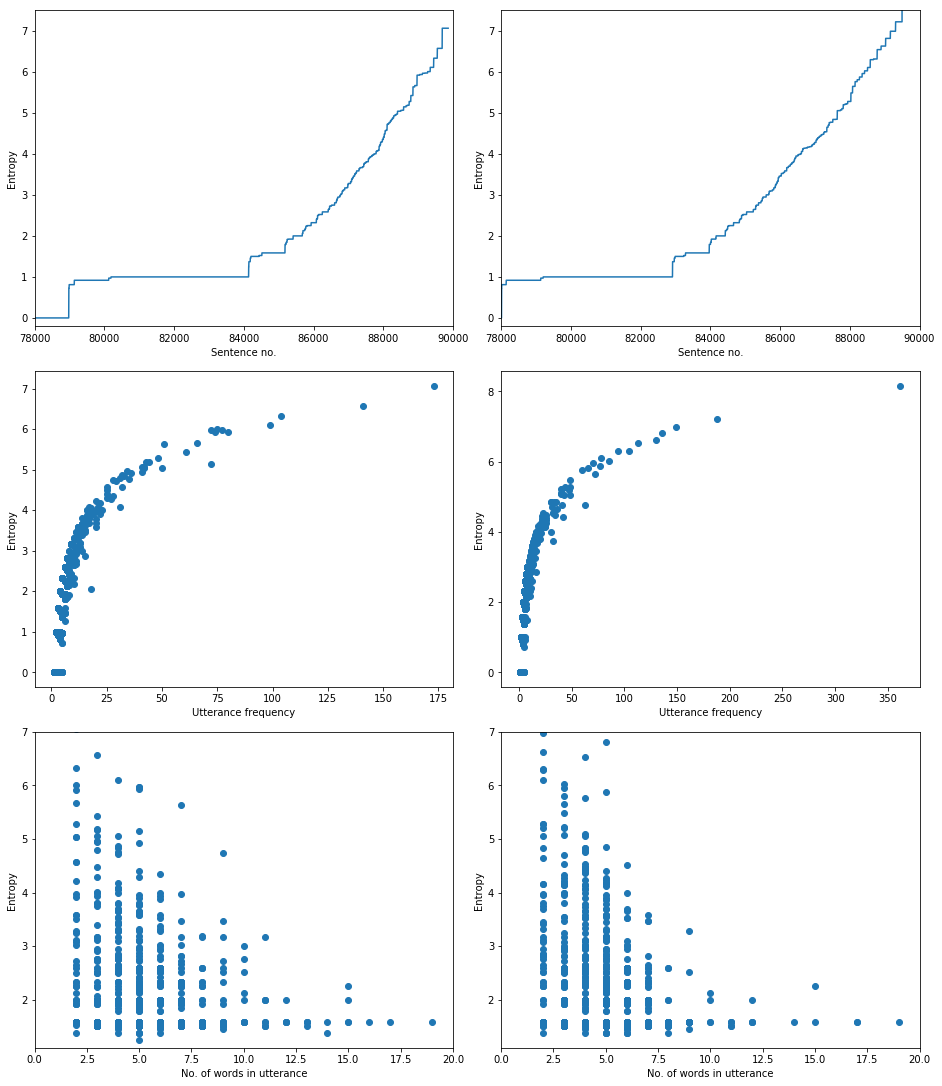

In [34]:
source_medoids, target_medoids, source_cl, target_cl=data_visualization(source_clusters, target_clusters, dataset)
source_cl=sorted(source_cl, key=operator.itemgetter(1), reverse=True)
target_cl=sorted(target_cl, key=operator.itemgetter(1), reverse=True)
source_medoids=sorted(source_medoids, key=operator.itemgetter(1), reverse=True)
target_medoids=sorted(target_medoids, key=operator.itemgetter(1), reverse=True)

In [49]:
medoid=source_medoids[5]
for i in range(100):
    print(target_medoids[i][0])
#print(medoid)
#print("\n".join(medoid_dict[medoid[0]]))

thank you .
yes .
ok .
thank you very much .
thanks .
here you are .
why ?
sure .
really ?
no problem .
i see .
what do you mean ?
all right .
thanks a lot .
why not ?
of course .
certainly .
what ?
anything else ?
what happened ?
no .
that 's right .
yes please .
what is it ?
bye .
how much is it ?
yes i do .
okay .
why is that ?
you 're welcome .
you are welcome .
no thanks .
goodbye .
see you .
what 's that ?
ok . here you are .
not at all .
yes it is .
that 's fine .
you re welcome .
thank you so much .
i hope so .
here you go .
yes sir .
that 's all right .
thank you !
no thank you .
do n't mention it .
i will .
good idea .
what 's the problem ?
what 's the matter ?
ok here you are .
yeah .
fine .
me too .
ok thank you .
are you sure ?
oh i see .
like what ?
i have no idea .
i think so .
are you serious ?
is that right ?
i see . thank you .
my pleasure .
how come ?
bye !
how about this one ?
what for ?
good .
yes i am .
yes that 's right .
no i do n't .
speaking .
how much ?
i do 

In [40]:
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl]
source_medoid_sen=[m[0] for m in source_medoids]
different=0

for i,medoid in enumerate(source_medoids[:700]):
    #print(source_cl[i][0]+"       "+medoid[0]+str(medoid[1]))
    if medoid[0] not in source_cl_sen[:700]:
        print(medoid[0])
        different+=1
print(different)

"""
for i,medoid in enumerate(source_cl_sen[:700]):
    #print(source_cl[i][0]+"       "+medoid[0]+str(medoid[1]))
    if medoid not in source_medoid_sen[:700]:
        print(medoid)
        different+=1
print(different)
"""

that 's correct .
what kind of music do you like ?
i 'm really not sure .
room service . may i help you ?
ok . thank you .
i can do that .
what brings you here ?
hi mark .
i appreciate that .
what is your greatest strength ?
may i see your passport please ?
yes may i help you ?
black .
is it good ?
i agree .
how much is the fine ?
how long have you had it ?
what made you decide to change your job ?
how about the lunch break lucy ?
did you need help with something ?
do you have a reservation sir ?
how do you like this waltz ?
where is the fitting room ?
yes . can i help you ?
how did you like it ?
that 's perfect .
what day is today ?
next please .
what 's the date today ?
what 's your name please ?
what !
have you taken your temperature ?
next week .
that 's it ?
yes thank you very much .
what do you recommend ?
that s great .
what would you suggest ?
oh yes .
good morning may i help you ?
thanks for everything .
nothing really .
are you ready ?
it seems you two are a good match . what

'\nfor i,medoid in enumerate(source_cl_sen[:700]):\n    #print(source_cl[i][0]+"       "+medoid[0]+str(medoid[1]))\n    if medoid not in source_medoid_sen[:700]:\n        print(medoid)\n        different+=1\nprint(different)\n'

0
